In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

from os import listdir
from os.path import isfile, join
import re
import csv

In [331]:
def get_Astar(b, a=10):
    A_outer = a**2
    A_inner = b**2
    A_diff = A_outer - A_inner
    return A_diff/A_outer

def get_b(L, a=10, t=0.4):
    T = L*t
    b = a - 2*T
    return b if b > 0 else 0
    

In [332]:
data_dir = './data'

files = [join(data_dir, f) for f in listdir(data_dir) if isfile(join(data_dir, f))]


In [333]:
files


['./data/265C_13L_5.csv',
 './data/265C_7L_2.csv',
 './data/245C_4L_7.csv',
 './data/245C_4L_1.csv',
 './data/245C_7L_6.csv',
 './data/245C_13L_4.csv',
 './data/265C_7L_1.csv',
 './data/245C_4L_6.csv',
 './data/265C_7L_3.csv',
 './data/245C_4L_2.csv',
 './data/265C_2L_1.csv',
 './data/265C_13L_3.csv',
 './data/245C_7L_5.csv',
 './data/245C_7L_2.csv',
 './data/265C_7L_4.csv',
 './data/265C_2L_2.csv',
 './data/245C_2L_3.csv',
 './data/245C_4L_8.csv',
 './data/245C_7L_3.csv',
 './data/245C_13L_2.csv',
 './data/245C_4L_4.csv',
 './data/245C_4L_5.csv',
 './data/245C_13L_1.csv',
 './data/265C_4L_3.csv',
 './data/245C_7L_1.csv',
 './data/265C_4L_1.csv',
 './data/245C_13L_3.csv',
 './data/265C_4L_2.csv',
 './data/245C_2L_2.csv',
 './data/265C_13L_4.csv',
 './data/245C_7L_4.csv',
 './data/265C_13L_1.csv',
 './data/265C_13L_2.csv',
 './data/245C_13L_5.csv',
 './data/265C_2L_3.csv',
 './data/245C_2L_1.csv',
 './data/245C_4L_3.csv']

In [334]:
re_str = '(\d*)C_(\d*)L_(\d*).csv'
re_s = re.compile(re_str)

def gen_row(fname):
    f_data = re_s.search(fname)
    temp = int(f_data.group(1))
    L = int(f_data.group(2))
    Astar = get_Astar(get_b(L))
    trial = int(f_data.group(3))
    comment = ''
    df = None
    with open(fname) as f:
        csv_reader = csv.reader(f)
        row1 = next(csv_reader)
        comment = row1[3] if len(row1) > 3 else '' # All comments were on column D in the first row
        df = pd.read_csv(fname, skiprows=8, usecols=[0, 1], names=['deflection', 'force'])
    
    return (temp, Astar, trial, comment, df)
    

In [335]:
data = list(map(gen_row, files))
data_df = pd.DataFrame(data, columns=['temp [C]', 'A*', 'trial', 'comment', 'data'])
data_df

,temp [C],A*,trial,comment,data
0,265,1.0000,5,Malformed layer (some walls not adhered_,deflection force 0 0.002222 -0...
1,265,0.8064,2,,deflection force 0 0.002222 ...
2,245,0.5376,7,Broke weird (clamping force too high),deflection force 0 0.006666 0...
3,245,0.5376,1,,deflection force 0 9.543417e+06 ...
4,245,0.8064,6,,deflection force 0 0.002222 ...
5,245,1.0000,4,Sample started sliding in test,deflection force 0 0.004444 ...
6,265,0.8064,1,,deflection force 0 0.006666 ...
7,245,0.5376,6,,deflection force 0 0.002222 -0...
8,265,0.8064,3,,deflection force 0 0.006666 ...
9,245,0.5376,2,,deflection force 0 0.002222 -22...


Let's figure out how to filter out data to what we're interested in

In [336]:
d = data_df.iloc[0]['data']
d_s = d.iloc[1:]

In [337]:
d.head()

,deflection,force
0,0.002222,-0.129843
1,0.006666,-0.129843
2,0.015554,-0.129843
3,0.024442,15.737014
4,0.033330,165.524292


In [338]:
d_s.head()

,deflection,force
1,0.006666,-0.129843
2,0.015554,-0.129843
3,0.024442,15.737014
4,0.033330,165.524292
5,0.044440,390.724579


In [370]:
d_inc = d.loc[(d['force'] > d['force'].shift()) & (d['force'] > 10)]
d_inc.head()

,deflection,force
3,0.024442,15.737014
4,0.033330,165.524292
5,0.044440,390.724579
6,0.055550,671.186218
7,0.066660,977.454529


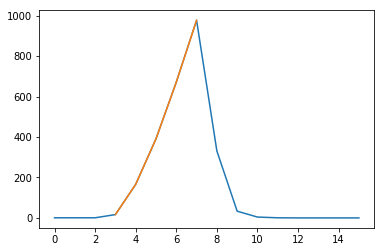

In [371]:
d_s = d.iloc[10:]
plt.plot(d['force'])
plt.plot(d_inc['force'])
plt.show()

Now we can create a function to filter out extraneous data

In [382]:
# Ignore values below 30 newtons
def get_real_data(d, f_thresh=30):
    idxmax = d['force'].idxmax()
    out = d.loc[(d['force'] > d['force'].shift()) & (d['force'] > f_thresh) & (d.index <= idxmax)]
    return out

In [383]:
# Make a copy of the dataframe with only the test data we're interested in
data_df['real_data'] = data_df['data'].apply(get_real_data)

Let's make sure that we're actually getting the values we're interested in

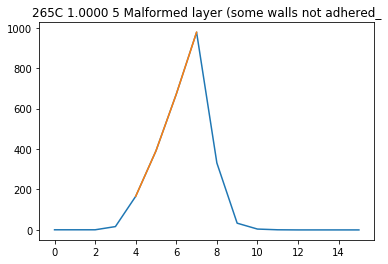

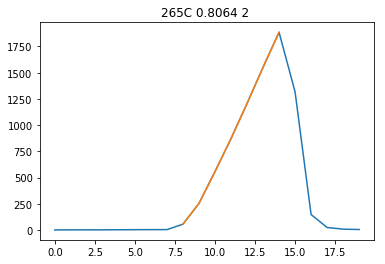

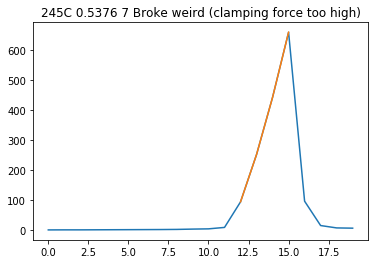

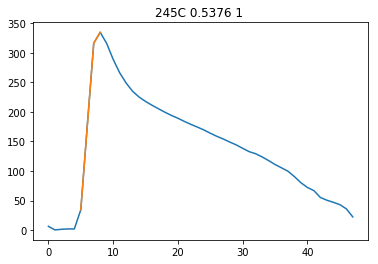

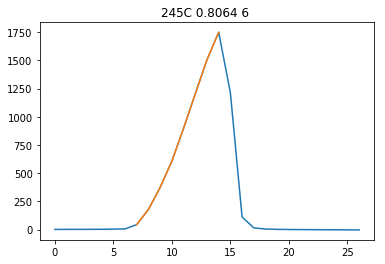

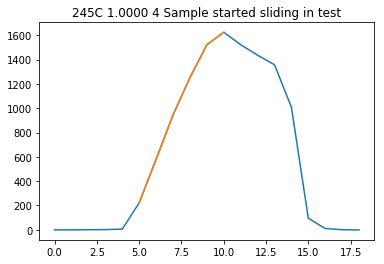

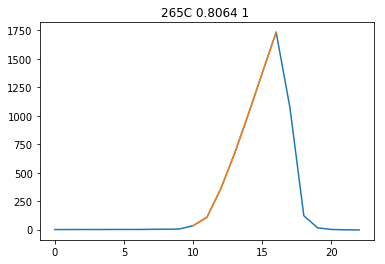

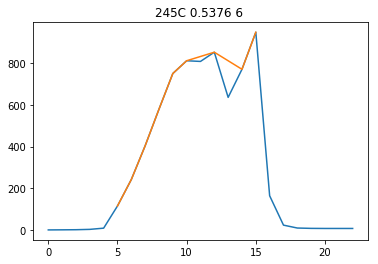

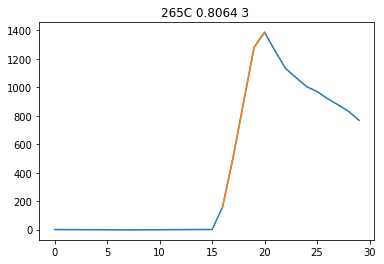

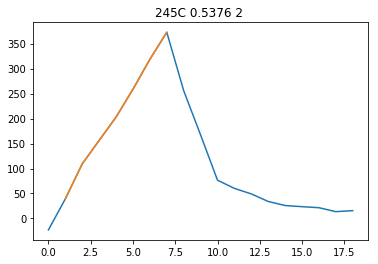

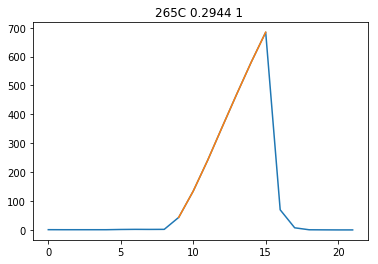

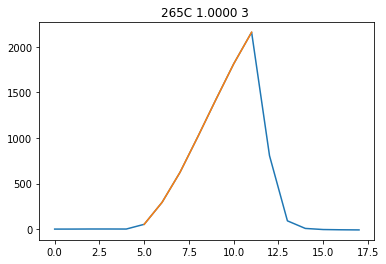

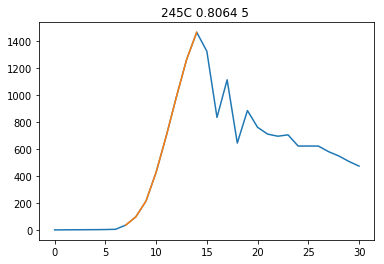

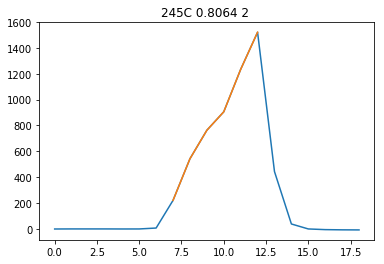

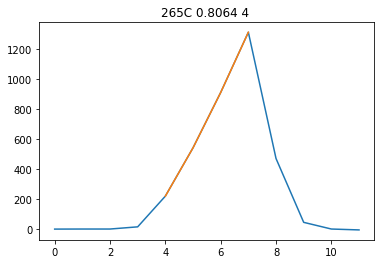

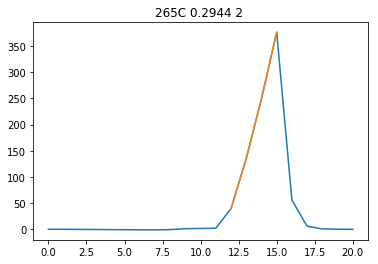

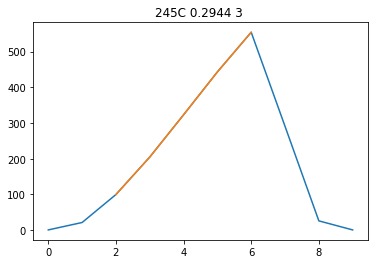

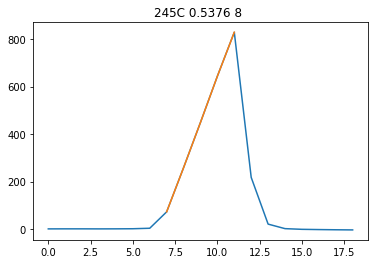

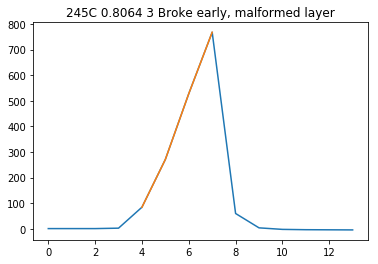

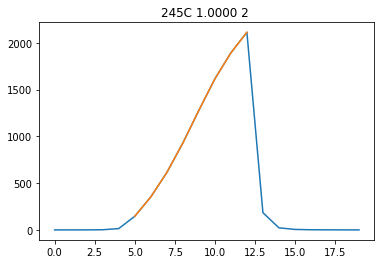

In [384]:
#for a in list(data_df.loc[data_df['comment'] == '']['data']): 
for row in data_df.itertuples():
    #print(row)
    temp = row._1
    Astar = row._2
    trial = row.trial
    comment = row.comment
    a = row.data
    b = row.real_data
    plt.plot(a['force'])
    plt.plot(b['force'])
    plt.title(f'{temp}C {Astar:.4f} {trial} {comment}')
    plt.show()



Now we can find the elastic modulous and ultimate tensile strength

In [385]:
def get_max(d):
    return d['force'].max()

def get_E(d):
    x = d['deflection']
    y = d['force']
    slope, intercept, r, p, stderr = linregress(x, y)
    return (slope, r, p, stderr)

In [386]:
data_df['max_force'] = data_df['real_data'].apply(get_max)
data_df[['E_slope', 'E_r', 'E_p', 'E_stderr']] = data_df['real_data'].apply(lambda x: pd.Series(get_E(x)))

In [381]:
data_df

,temp [C],A*,trial,comment,data,real_data,max_force,E_slope,E_r,E_p,E_stderr
0,265,1.0000,5,Malformed layer (some walls not adhered_,deflection force 0 0.002222 -0...,deflection force 4 0.03333 165.5...,977.454529,24448.716022,0.997722,2.277879e-03,1168.864883
1,265,0.8064,2,,deflection force 0 0.002222 ...,deflection force 8 0.097768 ...,1885.704956,21591.726250,0.996927,1.003832e-06,758.760395
2,245,0.5376,7,Broke weird (clamping force too high),deflection force 0 0.006666 0...,deflection force 12 0.153318 94...,658.487549,14128.888441,0.997533,2.466720e-03,703.027818
3,245,0.5376,1,,deflection force 0 9.543417e+06 ...,deflection force 6 9.543417e+06 1...,334.917938,7143.137513,0.914356,2.653946e-01,3163.242534
4,245,0.8064,6,,deflection force 0 0.002222 ...,deflection force 8 0.086658 1...,1749.134521,22865.717843,0.997926,3.760189e-07,659.688728
5,245,1.0000,4,Sample started sliding in test,deflection force 0 0.004444 ...,deflection force 5 0.055550 2...,1625.165649,24050.482221,0.983656,3.985171e-04,2201.232195
6,265,0.8064,1,,deflection force 0 0.006666 ...,deflection force 11 0.153318 1...,1733.868896,22350.000471,0.997787,7.337684e-06,744.613981
7,245,0.5376,6,,deflection force 0 0.002222 -0...,deflection force 5 0.051106 114...,948.767578,6009.757135,0.889990,1.303643e-03,1163.772402
8,265,0.8064,3,,deflection force 0 0.006666 ...,deflection force 16 0.235532 1...,1386.858765,21453.546039,0.991237,9.834192e-04,1650.623117
9,245,0.5376,2,,deflection force 0 0.002222 -22...,deflection force 2 0.017776 109.2...,372.650391,3966.030457,0.999402,5.357533e-07,68.592374


Let's check to see that the Young's modulus makes sense

(array([2., 0., 4., 0., 3., 1., 1., 3., 1., 5.]),
 array([ 4206.5642922 ,  6370.37340616,  8534.18252011, 10697.99163407,
        12861.80074802, 15025.60986198, 17189.41897593, 19353.22808989,
        21517.03720384, 23680.8463178 , 25844.65543175]),
 <a list of 10 Patch objects>)

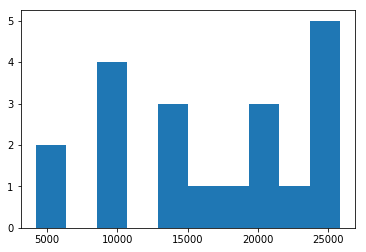

In [388]:
plt.hist(data_df['E_slope'])

In [390]:
data_245 = data_df.loc[data_df['temp [C]'] == 245]
data_265 = data_df.loc[data_df['temp [C]'] == 265]

Text(0.5,0,'Infill Ratio')

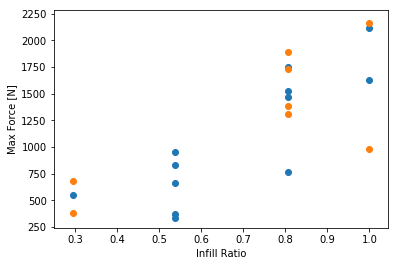

In [399]:
plt.scatter(data_245['A*'], data_245['max_force'])
plt.scatter(data_265['A*'], data_265['max_force'])
plt.ylabel('Max Force [N]')
plt.xlabel('Infill Ratio')

Text(0.5,0,'Infill Ratio')

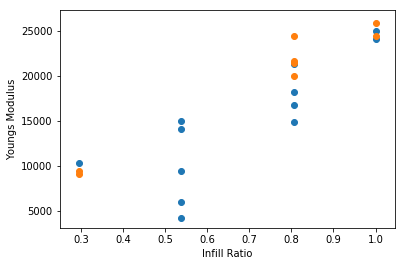

In [401]:
plt.scatter(data_245['A*'], data_245['E_slope'])
plt.scatter(data_265['A*'], data_265['E_slope'])
plt.ylabel('Youngs Modulus')
plt.xlabel('Infill Ratio')